https://hoangnv.hashnode.dev/detect-body-gestures-to-control-rpg-game-using-mediapipe
https://medium.com/mlearning-ai/an-easy-guide-for-pose-estimation-with-googles-mediapipe-a7962de0e944
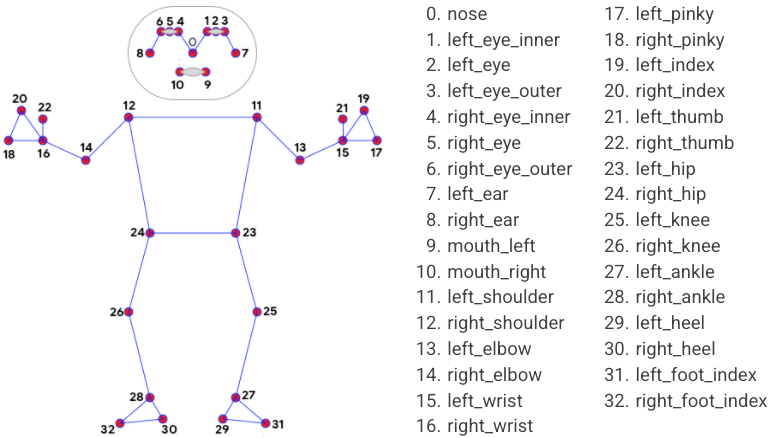

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import math
import pyautogui
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [2]:
def get_landmark_coordinates(landmarks, landmark):
    value = landmarks[landmark.value]
    return [
        value.x,
        value.y,
        value.z,
        value.visibility,
    ]


In [3]:
# calculate angle between line ab and bc
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle


In [4]:
def calculate_angle_horizon(point1, point2):
    """ Calculate angle of a single line """
    x_diff = point2[0] - point1[0]
    y_diff = point2[1] - point1[1]
    return math.degrees(math.atan2(y_diff, x_diff))

In [5]:
def calculate_distance(a, b):
    a = np.array(a[0:1])
    b = np.array(b[0:1])
    
    squared_dist = np.sum((a-b)**2, axis=0)
    dist = np.sqrt(squared_dist)
    return dist

In [6]:
import pyautogui
import pydirectinput

In [7]:
def check_visibility(points):
    if all([p[3] > 0.9 for p in points]):
        return True
    return False


In [8]:
def detect_arm_hit(points):
    if check_visibility(points) and calculate_angle(*points) > 120:    
        pydirectinput.press("3")
        return True
    return False

In [9]:
def detect_arm_block(points):
    if check_visibility(points) and calculate_angle(*points) > 110:   
        pydirectinput.press("4")
        return True
    return False

In [10]:
def detect_dodge(points):
    if check_visibility(points) and calculate_angle_horizon(*points) < 65:   
        pydirectinput.press("5")
        return True
    return False

In [11]:
from IPython.display import display, clear_output

In [12]:
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      #print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue
      # To improve performance, optionally mark the image as not writeable to
      # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)
    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
    try:
      pose_landmarks = results.pose_landmarks.landmark
    except:
      continue
    # Get coordinates
    left_shoulder = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.LEFT_SHOULDER)
    right_shoulder = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.RIGHT_SHOULDER)
    left_elbow = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.LEFT_ELBOW)
    right_elbow = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.RIGHT_ELBOW)
    left_wrist = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.LEFT_WRIST)
    right_wrist = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.RIGHT_WRIST)
    left_hip = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.LEFT_HIP)
    right_hip = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.RIGHT_HIP)
    left_knee = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.LEFT_KNEE)
    right_knee = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.RIGHT_KNEE)
    left_ankle = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.LEFT_ANKLE)
    right_ankle = get_landmark_coordinates(pose_landmarks, mp_pose.PoseLandmark.RIGHT_ANKLE)

    clear_output(wait=True)
    display(calculate_angle_horizon(left_shoulder, left_hip),
          detect_dodge([left_shoulder, left_hip]))
  
    if cv2.waitKey(5) & 0xFF == 27:
      break    

cap.release()

131.26434210174068

False

: 